## Dependencies

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("../Resources/emissions_since1961_total_data.csv")
df.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,NaN,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,NaN,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,NaN,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,NaN,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,NaN,11388000,10.638962,0.121


## Data Exploration and Cleaning

In [3]:
# How many and which countries are in our dataset?
print(len(df['country'].unique()))
print(df['country'].unique())

46
['Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'China' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Korea'
 'Romania' 'Russia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'USA' 'Global']


In [4]:
# Which countries are missing coal data?
df[df['coal'].isnull()]["country"].unique()

array(['Liechtenstein'], dtype=object)

In [5]:
df[(df['country'] == 'Liechtenstein') & df['coal'].isnull() == True]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1464,Liechtenstein,LIE,1961,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16834,0.0,1.057
1465,Liechtenstein,LIE,1962,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17221,0.0,-0.484
1466,Liechtenstein,LIE,1963,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17625,0.0,-0.775
1467,Liechtenstein,LIE,1964,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18058,0.0,0.060
1468,Liechtenstein,LIE,1965,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18500,0.0,-0.834
1469,Liechtenstein,LIE,1966,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18957,0.0,0.414
1470,Liechtenstein,LIE,1967,0.0,NaN,NaN,NaN,NaN,NaN,NaN,19467,0.0,0.549
1471,Liechtenstein,LIE,1968,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20011,0.0,0.018
1472,Liechtenstein,LIE,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20558,0.0,-0.012
1473,Liechtenstein,LIE,1970,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21089,0.0,-0.550


In [6]:
# Where is the other missing value in cement?
df[df['cement'].isnull()]["country"].unique()

array(['Iceland', 'Liechtenstein'], dtype=object)

In [7]:
# The last missing value from cement is in Iceland 2021
df[(df['country'] == 'Iceland') & (df['cement'].isnull() == True)]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1158,Iceland,ISL,2021,3.374964,0.667573,2.526131,0.0002,NaN,0.174873,0.006187,372520,9.113272,0.993


In [8]:
# The cement values have been 0 since 2012, so we can fill this value in as 0 too. 
df[(df['country'] == 'Iceland') & (df['year'] > 2010)]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1148,Iceland,ISL,2011,3.494164,0.639488,2.652413,0.000161,0.019647,0.179512,0.002943,319014,10.943442,1.026
1149,Iceland,ISL,2012,3.490870,0.658973,2.655749,0.000041,0.000000,0.172050,0.004056,320716,10.875697,0.748
1150,Iceland,ISL,2013,3.480080,0.661003,2.642490,0.000062,0.000000,0.173138,0.003387,323764,10.740192,0.776
1151,Iceland,ISL,2014,3.436352,0.625165,2.625463,0.000148,0.000000,0.182954,0.002622,327386,10.488067,1.737
1152,Iceland,ISL,2015,3.533853,0.661181,2.705333,0.000182,0.000000,0.163135,0.004022,330815,10.674359,0.494
1153,Iceland,ISL,2016,3.485184,0.660089,2.672440,0.000080,0.000000,0.148961,0.003613,335439,10.382613,1.485
1154,Iceland,ISL,2017,3.601620,0.693221,2.758626,0.000048,0.000000,0.146479,0.003247,343400,10.481037,1.770
1155,Iceland,ISL,2018,3.658953,0.715029,2.783351,0.000032,0.000000,0.156462,0.004080,352721,10.366893,0.892
1156,Iceland,ISL,2019,3.546263,0.684012,2.692315,0.000227,0.000000,0.163106,0.006603,360563,9.829598,1.396
1157,Iceland,ISL,2020,3.328876,0.667573,2.480043,0.000200,0.000000,0.174873,0.006187,366463,9.078694,0.851


In [9]:
# What about the values missing from other? 
# It seems almost every country is missing other data.
df[df['other'].isnull()]["country"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'South Korea',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Global'],
      dtype=object)

In [10]:
# Remove the countries that were missing about half their target values
df_temp = df[~df['country'].isin(df[df['temp_change'].isnull()]["country"].unique())]

# Remove the rows where coal (and oil, gas, cement, and flaring) is null
df_dropped = df_temp[df_temp['coal'].notnull()]

In [11]:
# Remove the rows where temp change is null
df_temp = df[df['temp_change'].notnull()]

# Remove the rows where coal (and oil, gas, cement, and flaring) is null
df_dropped = df_temp[df_temp['coal'].notnull()]

In [12]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2356 non-null   object 
 1   country_code  2356 non-null   object 
 2   year          2356 non-null   int64  
 3   total         2356 non-null   float64
 4   coal          2356 non-null   float64
 5   oil           2356 non-null   float64
 6   gas           2356 non-null   float64
 7   cement        2355 non-null   float64
 8   flaring       2356 non-null   float64
 9   other         1486 non-null   float64
 10  population    2356 non-null   int64  
 11  per_capita    2356 non-null   float64
 12  temp_change   2356 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 257.7+ KB


In [13]:
df_filled = df_dropped.fillna(value={'other': 0,
                                    'cement': 0})

In [14]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2356 non-null   object 
 1   country_code  2356 non-null   object 
 2   year          2356 non-null   int64  
 3   total         2356 non-null   float64
 4   coal          2356 non-null   float64
 5   oil           2356 non-null   float64
 6   gas           2356 non-null   float64
 7   cement        2356 non-null   float64
 8   flaring       2356 non-null   float64
 9   other         2356 non-null   float64
 10  population    2356 non-null   int64  
 11  per_capita    2356 non-null   float64
 12  temp_change   2356 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 257.7+ KB


In [15]:
country_encoding = {}
num = 1
for country in df_filled[df_filled['year'] == 2021].sort_values(by='total')['country']:
    country_encoding[country] = num
    num += 1
    
print(country_encoding)

{'Liechtenstein': 1, 'Malta': 2, 'Iceland': 3, 'Latvia': 4, 'Cyprus': 5, 'Luxembourg': 6, 'Estonia': 7, 'Slovenia': 8, 'Lithuania': 9, 'Croatia': 10, 'Denmark': 11, 'New Zealand': 12, 'Switzerland': 13, 'Slovakia': 14, 'Sweden': 15, 'Ireland': 16, 'Finland': 17, 'Portugal': 18, 'Norway': 19, 'Bulgaria': 20, 'Hungary': 21, 'Greece': 22, 'Belarus': 23, 'Austria': 24, 'Romania': 25, 'Belgium': 26, 'Czech Republic': 27, 'Netherlands': 28, 'Ukraine': 29, 'Spain': 30, 'Kazakhstan': 31, 'France': 32, 'Poland': 33, 'Italy': 34, 'United Kingdom': 35, 'Australia': 36, 'Turkey': 37, 'Brazil': 38, 'Canada': 39, 'South Korea': 40, 'Germany': 41, 'Japan': 42, 'Russia': 43, 'USA': 44, 'China': 45, 'Global': 46}


In [16]:
# Apply this encoding to create a new numerical column for the countries - called country_num
df_filled['country_num'] = df_filled['country'].apply(lambda x: country_encoding[x])
df_filled

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change,country_num
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.000000,0.000000,10483000,8.614547,0.151,36
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.000000,0.000000,10742000,8.852126,0.118,36
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.000000,0.000000,10950000,9.245287,-0.111,36
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.000000,0.000000,11167000,9.780775,-0.029,36
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.000000,0.000000,11388000,10.638962,0.121,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,7578157615,4.749682,1.424,46
2802,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,7661776338,4.792753,1.284,46
2803,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,7742681934,4.775633,1.449,46
2804,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,7820981524,4.497423,1.713,46


In [17]:
df_final = df_filled[['country_num', 'year', 'total', 'coal', 'oil', 
                      'gas', 'cement', 'flaring', 'other', 'population', 
                      'per_capita', 'temp_change']]
df_final

,country_num,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,36,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.000000,0.000000,10483000,8.614547,0.151
1,36,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.000000,0.000000,10742000,8.852126,0.118
2,36,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.000000,0.000000,10950000,9.245287,-0.111
3,36,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.000000,0.000000,11167000,9.780775,-0.029
4,36,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.000000,0.000000,11388000,10.638962,0.121
...,...,...,...,...,...,...,...,...,...,...,...,...
2801,46,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,7578157615,4.749682,1.424
2802,46,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,7661776338,4.792753,1.284
2803,46,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,7742681934,4.775633,1.449
2804,46,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,7820981524,4.497423,1.713


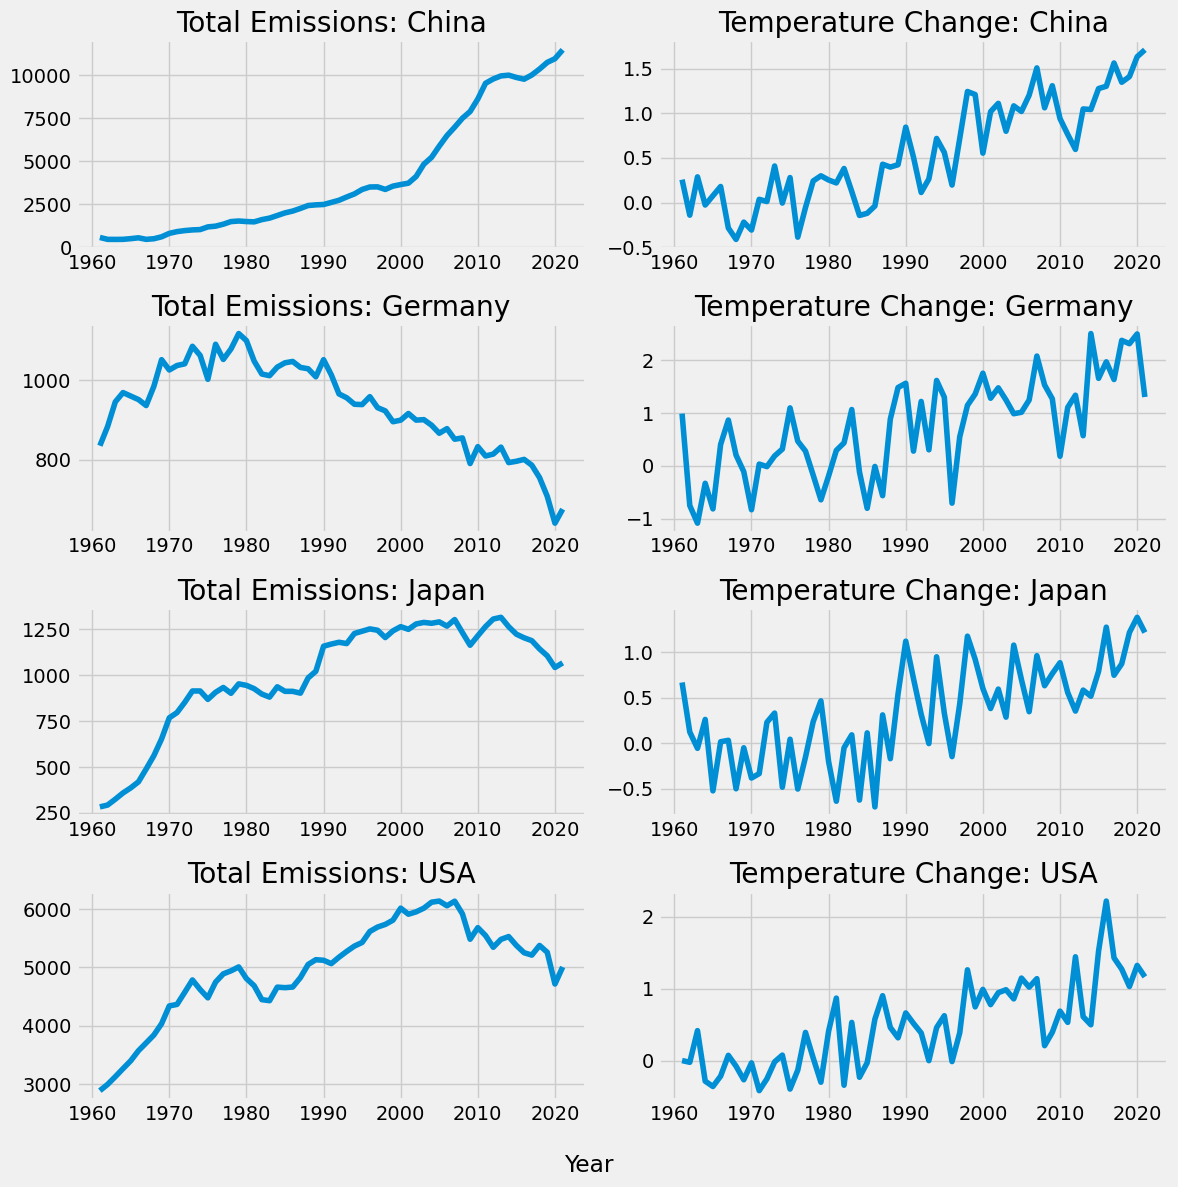

In [18]:
countries = ['China', 'Germany', 'Japan', 'USA']

fig, axs = plt.subplots(4, 2, figsize=(12, 12))

i = 0
for country in countries:
    c = df[df['country'] == country]
    axs[i,0].plot(c['year'], c['total'])
    axs[i,0].set_title(f"Total Emissions: {country}")
    axs[i,1].plot(c['year'], c['temp_change'])
    axs[i,1].set_title(f"Temperature Change: {country}")
    i += 1

fig.supxlabel('Year')
plt.tight_layout()
plt.show()

## Hyperparameter Optimization for Model Selection

In [19]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
# The AIC measures how well a model fits the data while taking into account the overall complexity of the model.

# A model that fits the data very well while using lots of features will be assigned a larger 
# AIC score than a model that uses fewer features to achieve the same goodness-of-fit. 

# Therefore, we are interested in finding the model that yields the lowest AIC value.



In [41]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_final,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [22]:
warnings.filterwarnings("ignore")

mod = sm.tsa.statespace.SARIMAX(df_final['temp_change'],
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15010D+00    |proj g|=  4.14965D-01


 This problem is unconstrained.



At iterate    5    f=  1.00272D+00    |proj g|=  8.97030D-02

At iterate   10    f=  9.86420D-01    |proj g|=  1.12591D-01
  ys=-7.956E-04  -gs= 3.418E-04 BFGS update SKIPPED

At iterate   15    f=  9.78157D-01    |proj g|=  1.32130D-02

At iterate   20    f=  9.78116D-01    |proj g|=  3.99480D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     39      1     1     0   3.995D-06   9.781D-01
  F =  0.97811567157422430     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

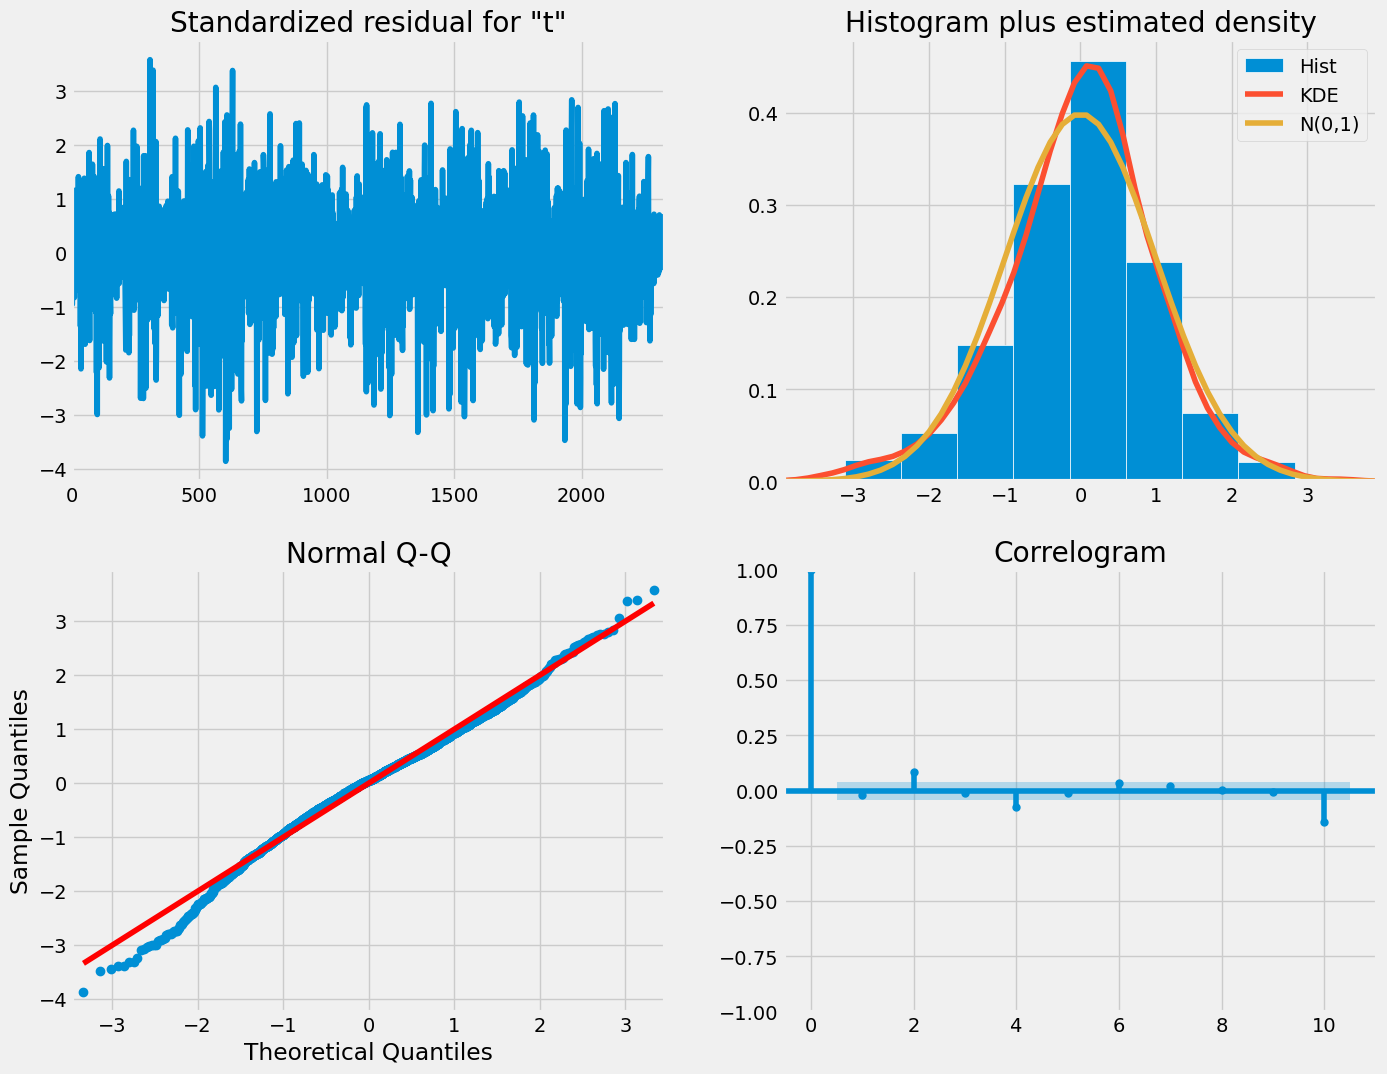

In [23]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [24]:
# In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) 
# is the standard notation for a normal distribution with mean 0 and standard deviation of 1). 
# This is a good indication that the residuals are normally distributed.

# The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend 
# of the samples taken from a standard normal distribution with N(0, 1). 
# Again, this is a strong indication that the residuals are normally distributed.

#T he residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. 
# This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, 
# which shows that the time series residuals have low correlation with lagged versions of itself.

# Some parameters of our seasonal ARIMA model could be changed to improve our model fit. 
# For example, our grid search only considered a restricted set of parameter combinations, 
# so we may find better models if we widened the grid search.

In [30]:
pred_dynamic = results.get_prediction(start=df_final['country_num'][0], dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

# The get_prediction() and conf_int() attributes allow us to obtain the values 
# and associated confidence intervals for forecasts of the time series.

In [31]:
# The dynamic=False argument ensures that we produce one-step ahead forecasts, 
#meaning that forecasts at each point are generated using the full history up to that point.

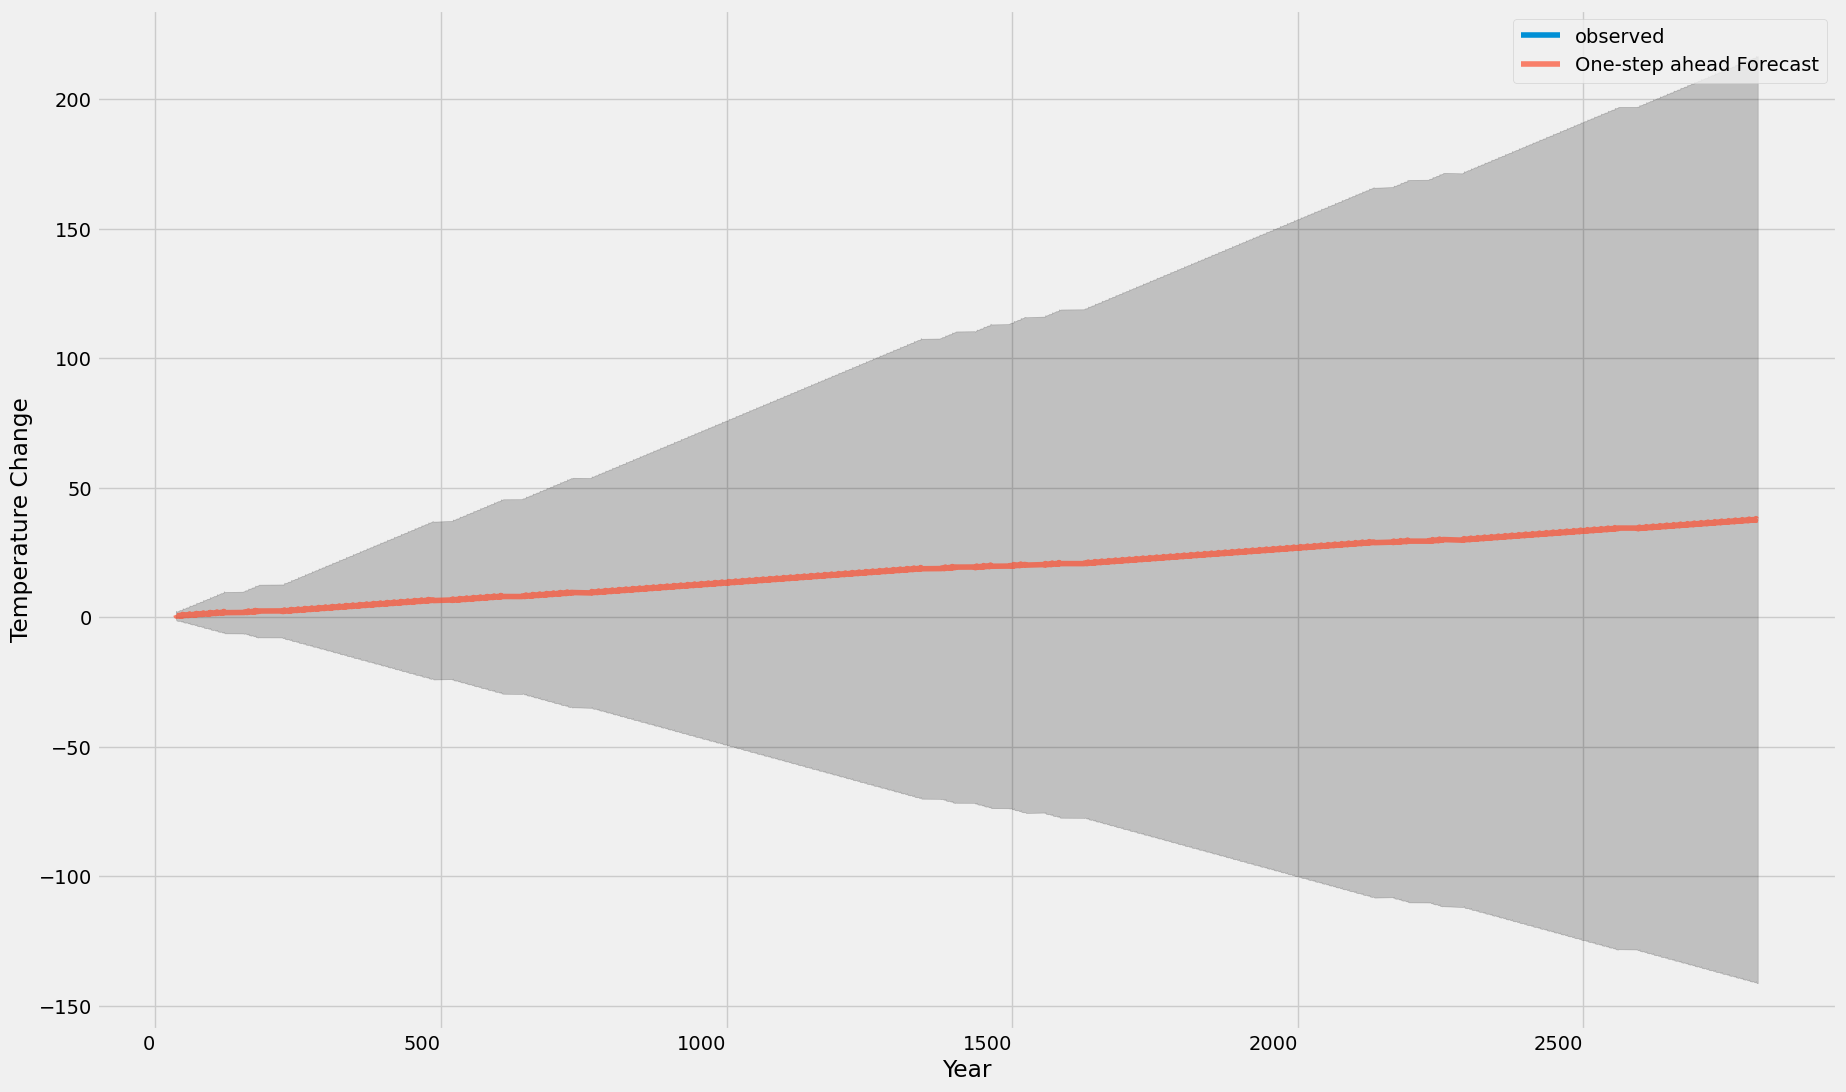

In [32]:
df_plot = df_final['temp_change']
df_plot.index = pd.to_datetime(df_plot.index)
df_plot.index = df_plot.index.strftime('%Y-%m-%d')
df_plot.index = pd.to_datetime(df_plot.index)

ax = df_plot['2012':'2030'].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_dymnamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Change')
plt.legend()

plt.show()

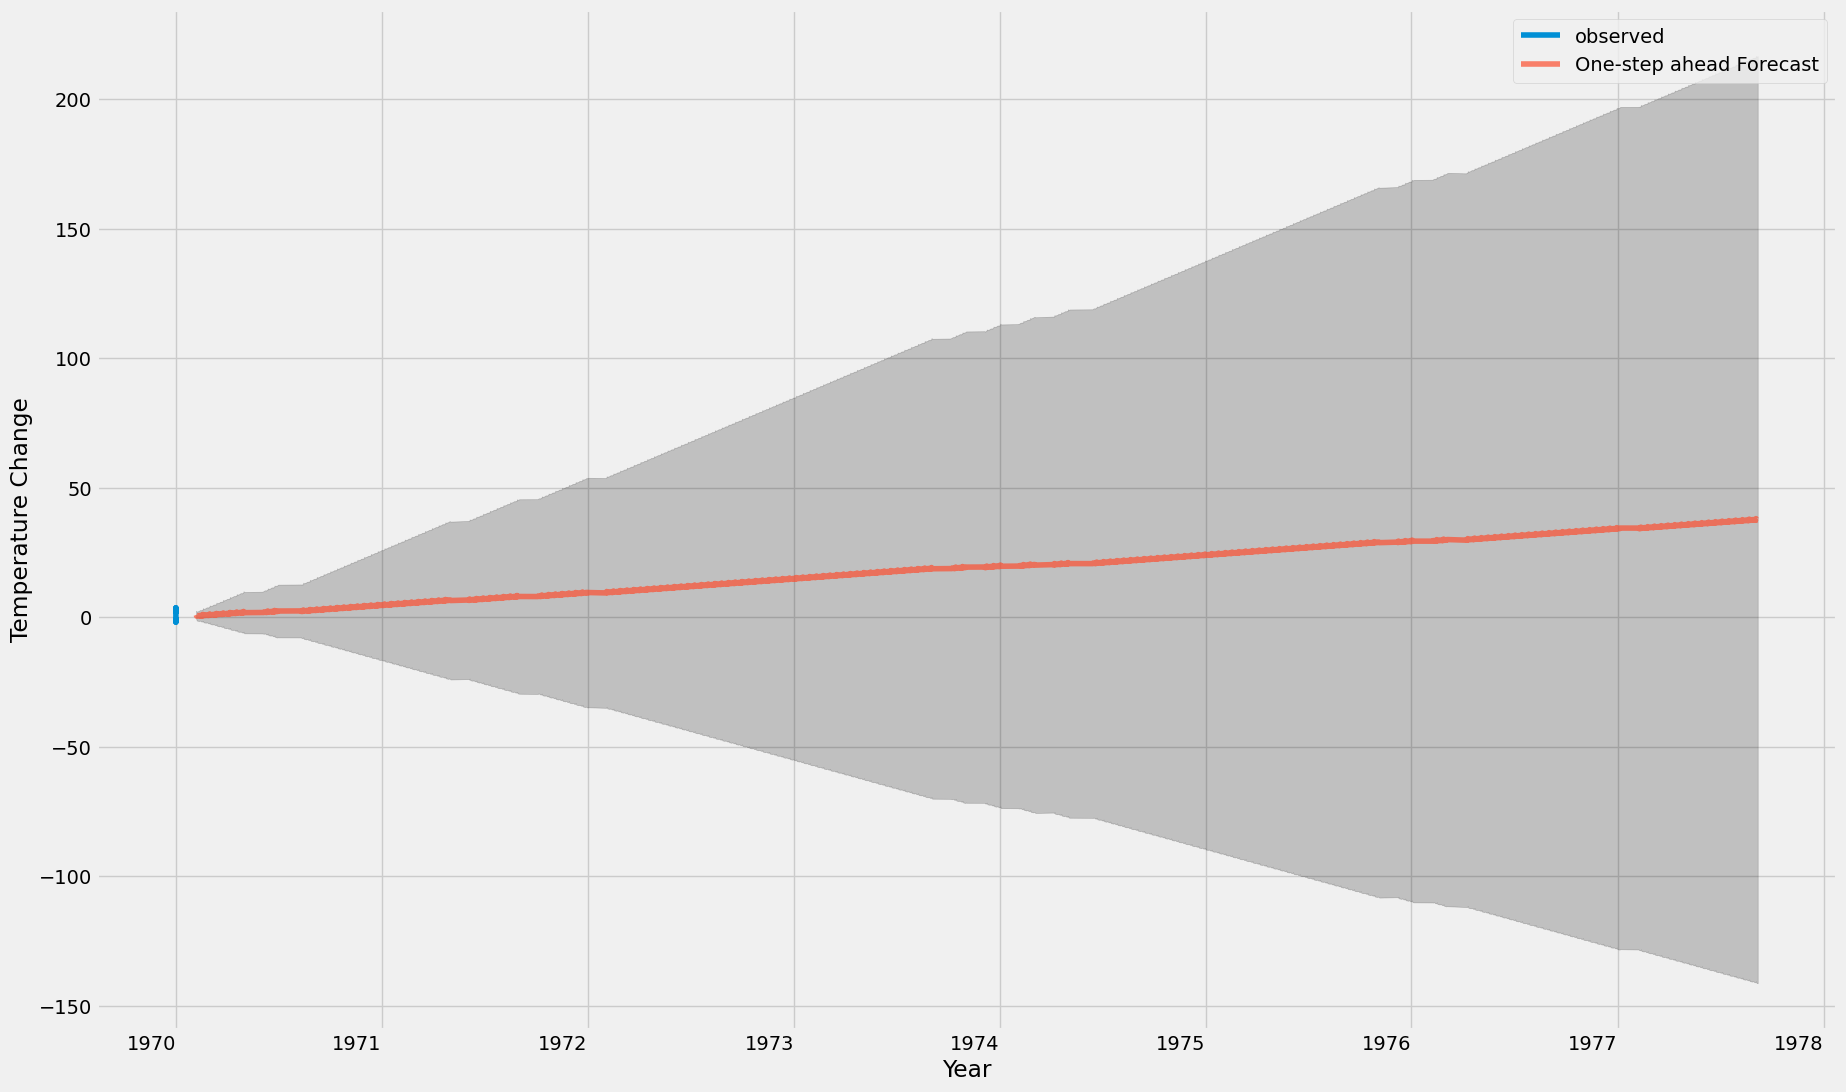

In [44]:
df_plot = df_plot[df_plot.index <= pd.to_datetime('2020-12-31')]

ax = df_plot.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Change')
plt.legend()

plt.show()

In [50]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
df_truth = df_final[df_final.index >= 2012]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print(f'The Mean Squared Error of our forecasts is: {mse}')

The Mean Squared Error of our forecasts is: 36            NaN
37            NaN
38            NaN
39            NaN
40            NaN
               ..
per_capita    NaN
population    NaN
temp_change   NaN
total         NaN
year          NaN
Length: 2332, dtype: float64


In [51]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

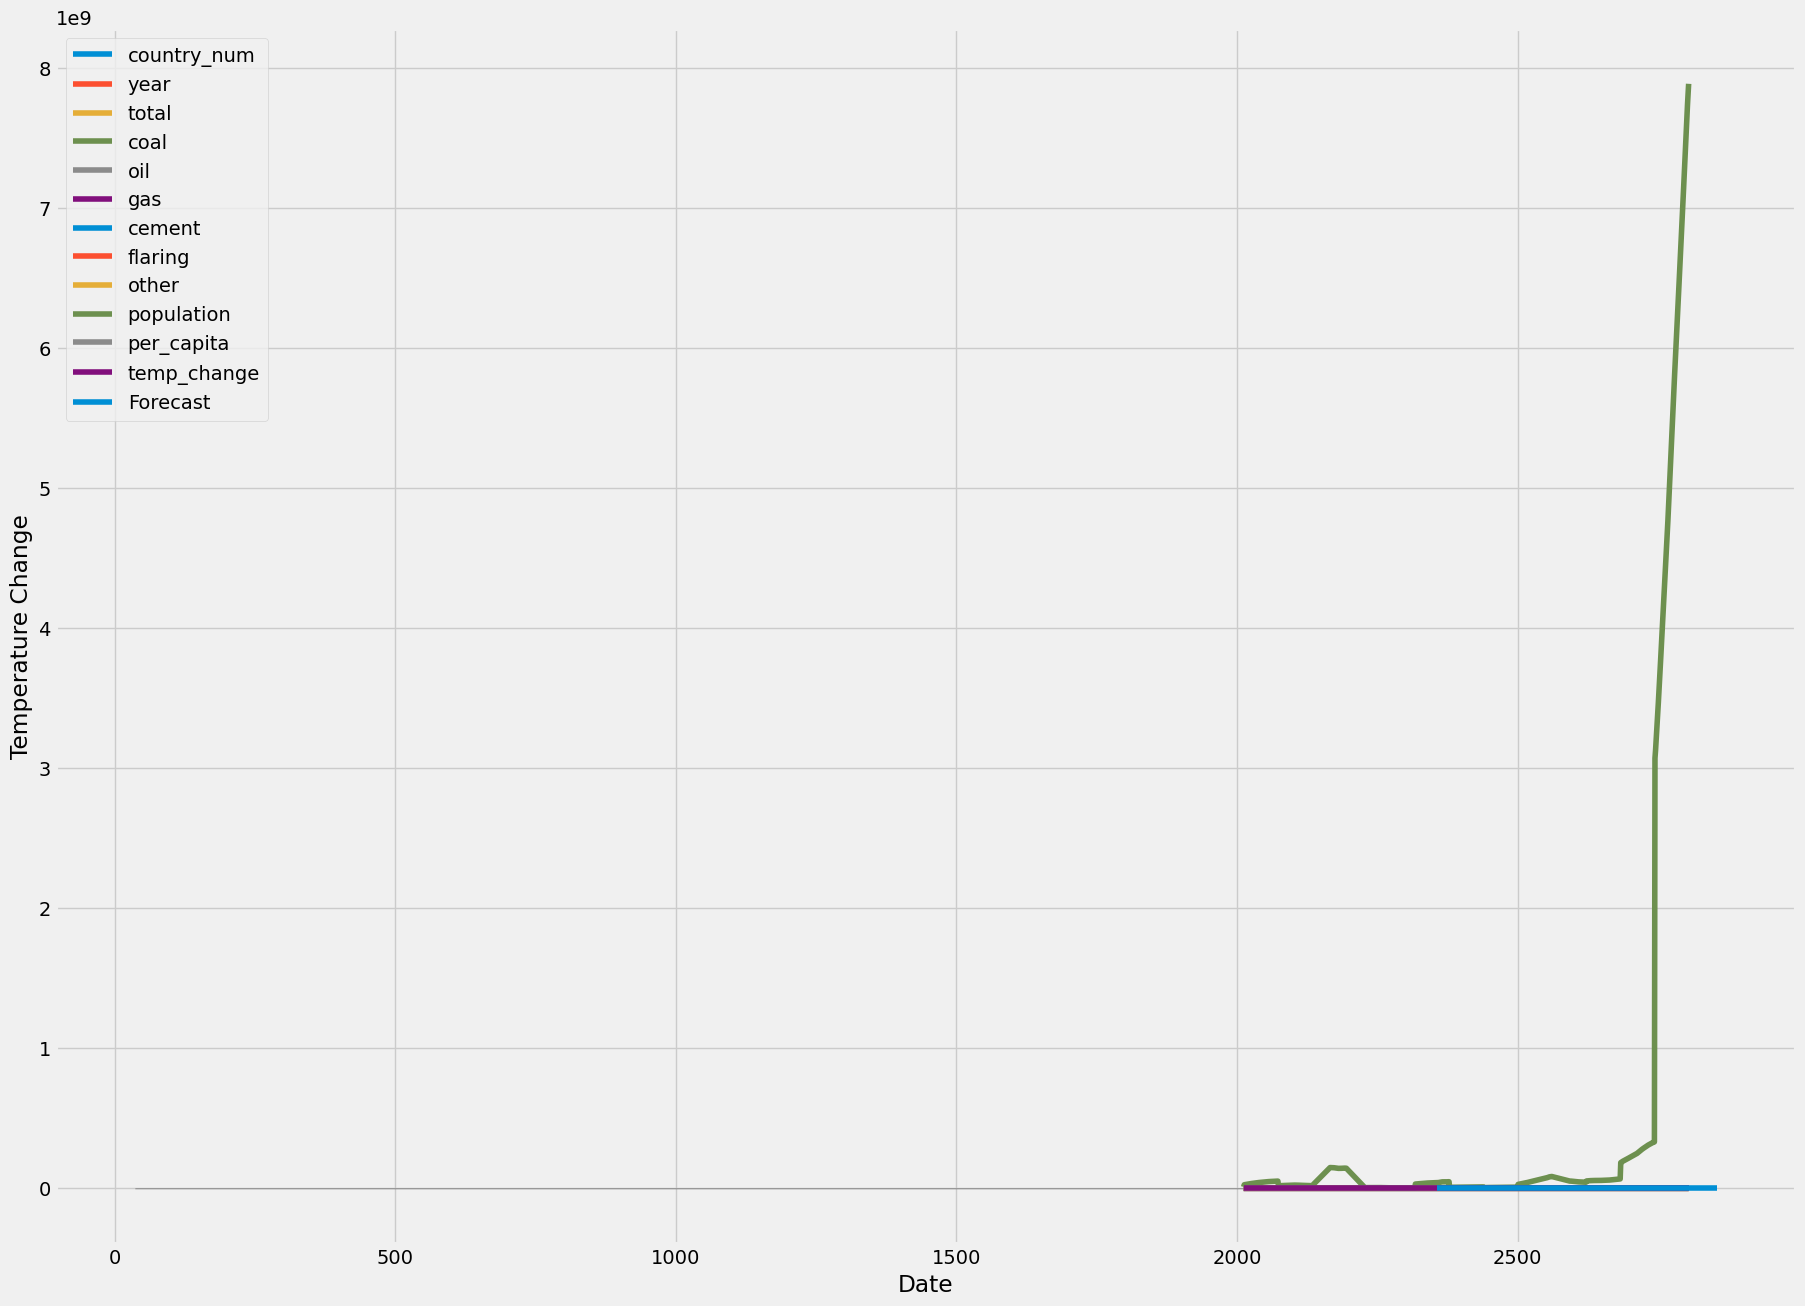

In [53]:
ax = df_final[df_final.index >= 2012].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature Change')

plt.legend()
plt.show()

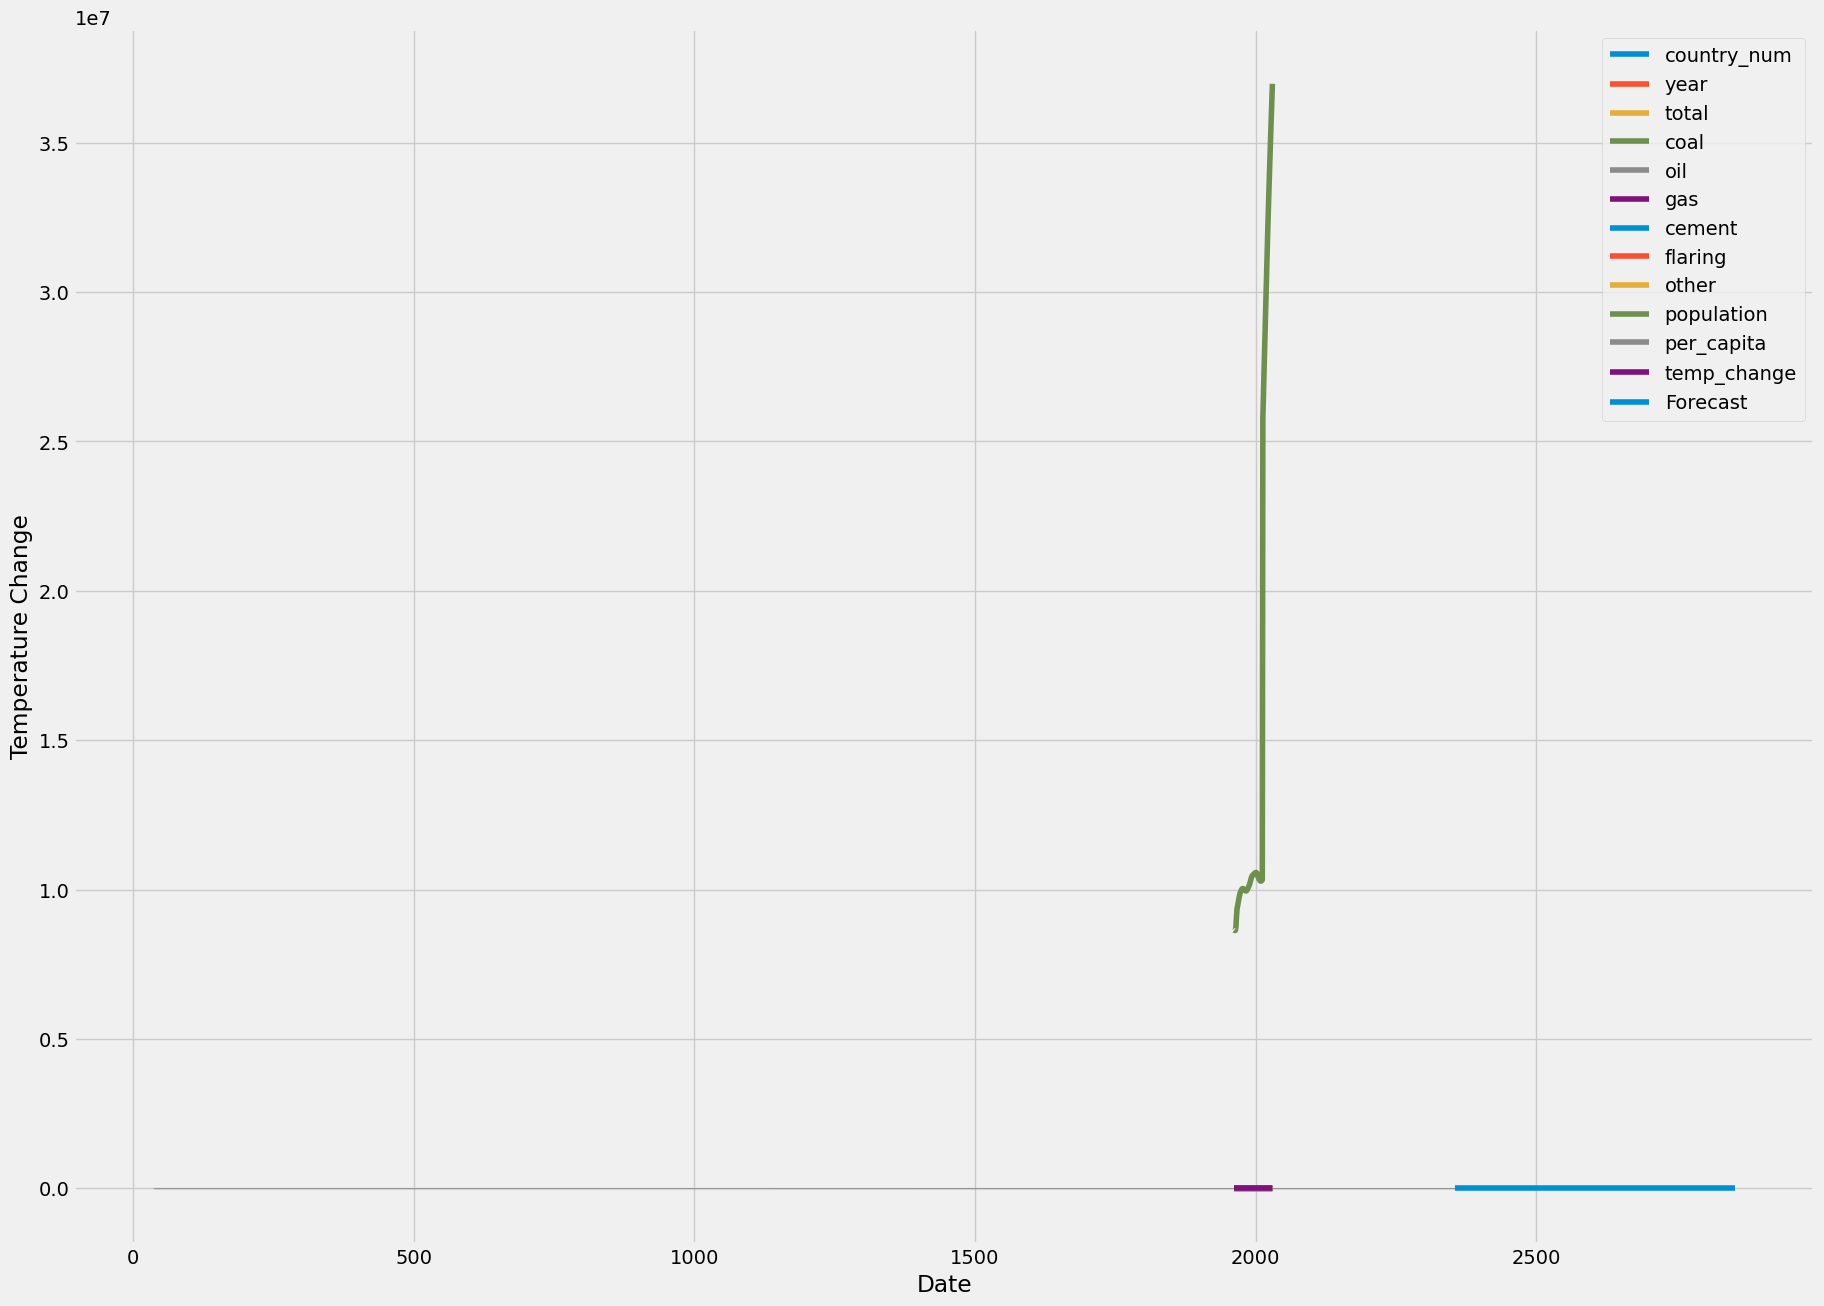

In [55]:
df_plot = df_final[(df_final.index >= 1962) & (df_final.index <= 2030)]

ax = df_plot.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature Change')

plt.legend()
plt.show()